In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
!ls ../raw_data/

holidays_events.csv  sample_submission.csv  test.csv	   transactions.csv
items.csv	     stores.csv		    train2016.csv
oil.csv		     stores_sales	    train.csv


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**train_data for 2016**

In [4]:
train_data = pd.read_csv('../raw_data/train2016.csv')

In [5]:
test_data = pd.read_csv('../raw_data/test.csv')
holiday_data = pd.read_csv('../raw_data/holidays_events.csv')
oil_data = pd.read_csv('../raw_data/oil.csv')

stores_data = pd.read_csv('../raw_data/stores.csv')
transactions_data = pd.read_csv('../raw_data/transactions.csv')

items_data = pd.read_csv('../raw_data/items.csv')

# Load train data at 1 year

Date is an object (Convert datetime)

In [74]:
train_data['date'] = pd.to_datetime(train_data['date'])

In [76]:
train_data['year'] = train_data['date'].dt.year

In [78]:
train_data['month'] = train_data['date'].dt.month

In [79]:
train_data['day'] = train_data['date'].dt.day

In [80]:
train_data['dayofweek'] = train_data['date'].dt.dayofweek

In [81]:
train_data_2017 = train_data[train_data['year'] == 2017]
train_data_2017

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,year,month,day,dayofweek


# Train data

In [8]:
train_data.head()

,Unnamed: 0,id,date,store_nbr,item_nbr,unit_sales,onpromotion,year
0,66458908,66458908,2016-01-01,25,105574,12.0,False,2016
1,66458909,66458909,2016-01-01,25,105575,9.0,False,2016
2,66458910,66458910,2016-01-01,25,105857,3.0,False,2016
3,66458911,66458911,2016-01-01,25,108634,3.0,False,2016
4,66458912,66458912,2016-01-01,25,108701,2.0,True,2016


In [9]:
train_data['store_nbr'].unique()

array([25,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       53, 54])

In [25]:
train_data.shape

(35229871, 8)

In [26]:
test_data.shape

(3370464, 5)

In [27]:
train_data.columns

Index(['Unnamed: 0', 'id', 'date', 'store_nbr', 'item_nbr', 'unit_sales',
       'onpromotion', 'year'],
      dtype='object')

## `onpromotion` ? (Value - onpromotion)

In [28]:
train_data['onpromotion'].unique()

array([False,  True])

# Oil data

In [29]:
oil_data.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [30]:
oil_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


# Holiday data

In [31]:
holiday_data.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


## `type`

In [32]:
holiday_data['type'].unique()

array(['Holiday', 'Transfer', 'Additional', 'Bridge', 'Work Day', 'Event'],
      dtype=object)

In [33]:
holiday_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


## `locale`

In [34]:
holiday_data['locale'].unique()

array(['Local', 'Regional', 'National'], dtype=object)

## `locale_name`

In [35]:
len(holiday_data['locale_name'].unique())

24

In [36]:
holiday_data['locale_name'].unique()

array(['Manta', 'Cotopaxi', 'Cuenca', 'Libertad', 'Riobamba', 'Puyo',
       'Guaranda', 'Imbabura', 'Latacunga', 'Machala', 'Santo Domingo',
       'El Carmen', 'Cayambe', 'Esmeraldas', 'Ecuador', 'Ambato',
       'Ibarra', 'Quevedo', 'Santo Domingo de los Tsachilas',
       'Santa Elena', 'Quito', 'Loja', 'Salinas', 'Guayaquil'],
      dtype=object)

# Stores data

In [37]:
stores_data.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


## `type`

In [38]:
stores_data['type'].unique()

array(['D', 'B', 'C', 'E', 'A'], dtype=object)

We have 54 stores in total

In [39]:
len(stores_data)

54

### Countplot y='type'

In [40]:
stores_data.groupby(by='type').count()[['store_nbr']]

,store_nbr
type,
A,9
B,8
C,15
D,18
E,4


<AxesSubplot:xlabel='count', ylabel='type'>

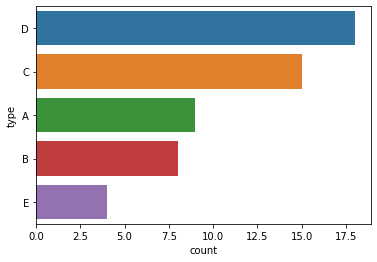

In [41]:
sns.countplot(y='type', data=stores_data, order=stores_data['type'].value_counts().index)

## `state`

In [42]:
len(stores_data['state'].unique())

16

In [43]:
stores_data['state'].unique()

array(['Pichincha', 'Santo Domingo de los Tsachilas', 'Cotopaxi',
       'Chimborazo', 'Imbabura', 'Bolivar', 'Pastaza', 'Tungurahua',
       'Guayas', 'Santa Elena', 'Los Rios', 'Azuay', 'Loja', 'El Oro',
       'Esmeraldas', 'Manabi'], dtype=object)

In [44]:
stores_data.groupby(by='state').count()[['store_nbr']]

,store_nbr
state,
Azuay,3
Bolivar,1
Chimborazo,1
Cotopaxi,2
El Oro,2
Esmeraldas,1
Guayas,11
Imbabura,1
Loja,1


### Countplot y='state'

<AxesSubplot:xlabel='count', ylabel='state'>

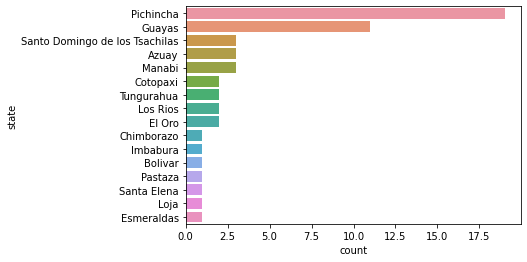

In [45]:
sns.countplot(y='state', data=stores_data, order=stores_data['state'].value_counts().index)

## `city`

In [46]:
len(stores_data['city'].unique())

22

In [47]:
stores_data['city'].unique()

array(['Quito', 'Santo Domingo', 'Cayambe', 'Latacunga', 'Riobamba',
       'Ibarra', 'Guaranda', 'Puyo', 'Ambato', 'Guayaquil', 'Salinas',
       'Daule', 'Babahoyo', 'Quevedo', 'Playas', 'Libertad', 'Cuenca',
       'Loja', 'Machala', 'Esmeraldas', 'Manta', 'El Carmen'],
      dtype=object)

### by `city`

In [48]:
by_city = stores_data[['store_nbr', 'city']].groupby(by='city')\
                                    .count()['store_nbr']\
                                    .sort_values(ascending=False)
pd.DataFrame(by_city)

,store_nbr
city,
Quito,18
Guayaquil,8
Santo Domingo,3
Cuenca,3
Manta,2
Machala,2
Latacunga,2
Ambato,2
Guaranda,1


## `cluster`
(To review later)

In [100]:
# stores_data['cluster'].unique()

In [101]:
# stores_data[['store_nbr', 'cluster']].groupby(by='cluster').count()

In [102]:
# train_data.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion'], dtype='object')

# Transactions data

In [49]:
transactions_data.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [50]:
transactions_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


# Items data

In [51]:
items_data.head()

,item_nbr,family,class,perishable
0,96995,GROCERY I,1093,0
1,99197,GROCERY I,1067,0
2,103501,CLEANING,3008,0
3,103520,GROCERY I,1028,0
4,103665,BREAD/BAKERY,2712,1


In [52]:
stores_data.shape

(54, 5)

In [53]:
items_data.shape

(4100, 4)

## `family`

In [55]:
items_data.columns

Index(['item_nbr', 'family', 'class', 'perishable'], dtype='object')

In [56]:
items_data['family'].unique()

array(['GROCERY I', 'CLEANING', 'BREAD/BAKERY', 'DELI', 'POULTRY', 'EGGS',
       'PERSONAL CARE', 'LINGERIE', 'BEVERAGES', 'AUTOMOTIVE', 'DAIRY',
       'GROCERY II', 'MEATS', 'FROZEN FOODS', 'HOME APPLIANCES',
       'SEAFOOD', 'PREPARED FOODS', 'LIQUOR,WINE,BEER', 'BEAUTY',
       'HARDWARE', 'LAWN AND GARDEN', 'PRODUCE', 'HOME AND KITCHEN II',
       'HOME AND KITCHEN I', 'MAGAZINES', 'HOME CARE', 'PET SUPPLIES',
       'BABY CARE', 'SCHOOL AND OFFICE SUPPLIES',
       'PLAYERS AND ELECTRONICS', 'CELEBRATION', 'LADIESWEAR', 'BOOKS'],
      dtype=object)

In [57]:
len(items_data['family'].unique())

33

# Merge 3 data (train, stores, items)

In [ ]:
# train_data = pd.read_csv('../raw_data/train.csv', nrows=10000)
# test_data = pd.read_csv('../raw_data/test.csv')
# holiday_data = pd.read_csv('../raw_data/holidays_events.csv')
# oil_data = pd.read_csv('../raw_data/oil.csv')

# stores_data = pd.read_csv('../raw_data/stores.csv')
# transactions_data = pd.read_csv('../raw_data/transactions.csv')

# items_data = pd.read_csv('../raw_data/items.csv')

In [60]:
train_data.columns

Index(['Unnamed: 0', 'id', 'date', 'store_nbr', 'item_nbr', 'unit_sales',
       'onpromotion', 'year'],
      dtype='object')

In [61]:
items_data.columns

Index(['item_nbr', 'family', 'class', 'perishable'], dtype='object')

In [62]:
stores_data.columns

Index(['store_nbr', 'city', 'state', 'type', 'cluster'], dtype='object')

In [63]:
train_data.shape

(35229871, 8)

In [65]:
# columns Unnamed: 0 drop

train_data.drop(columns='Unnamed: 0', inplace=True)

In [66]:
train_items_stores = train_data.merge(items_data, on='item_nbr')\
                                .merge(stores_data, on='store_nbr')
train_items_stores

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,year,family,class,perishable,city,state,type,cluster
0,66458908,2016-01-01,25,105574,12.0,False,2016,GROCERY I,1045,0,Salinas,Santa Elena,D,1
1,66505515,2016-01-02,25,105574,16.0,False,2016,GROCERY I,1045,0,Salinas,Santa Elena,D,1
2,66606098,2016-01-03,25,105574,9.0,False,2016,GROCERY I,1045,0,Salinas,Santa Elena,D,1
3,66705153,2016-01-04,25,105574,4.0,False,2016,GROCERY I,1045,0,Salinas,Santa Elena,D,1
4,66800668,2016-01-05,25,105574,6.0,False,2016,GROCERY I,1045,0,Salinas,Santa Elena,D,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35229866,101634524,2016-12-31,28,2036460,2.0,False,2016,DELI,2644,1,Guayaquil,Guayas,E,10
35229867,101309547,2016-12-28,28,2042436,16.0,False,2016,BEVERAGES,1122,0,Guayaquil,Guayas,E,10
35229868,101415706,2016-12-29,28,2042436,94.0,False,2016,BEVERAGES,1122,0,Guayaquil,Guayas,E,10
35229869,101524132,2016-12-30,28,2042436,90.0,False,2016,BEVERAGES,1122,0,Guayaquil,Guayas,E,10


In [ ]:
# try later

# train_items_stores.to_csv('train_items_stores.csv')

In [67]:
train_items_stores.shape

(35229871, 14)

In [68]:
train_items_stores.columns

Index(['id', 'date', 'store_nbr', 'item_nbr', 'unit_sales', 'onpromotion',
       'year', 'family', 'class', 'perishable', 'city', 'state', 'type',
       'cluster'],
      dtype='object')

# Group by a lot of things

In [71]:
# Example nb_sales / family
by_family = train_items_stores[['family', 'unit_sales']].groupby(by='family').sum()['unit_sales'].sort_values(ascending=False)
pd.DataFrame(by_family)

,unit_sales
family,
GROCERY I,8.608583e+07
BEVERAGES,6.174769e+07
PRODUCE,4.424810e+07
CLEANING,2.262604e+07
DAIRY,1.696719e+07
BREAD/BAKERY,1.025261e+07
POULTRY,7.561042e+06
MEATS,7.010526e+06
PERSONAL CARE,6.152929e+06


In [72]:
train_items_stores.columns

Index(['id', 'date', 'store_nbr', 'item_nbr', 'unit_sales', 'onpromotion',
       'year', 'family', 'class', 'perishable', 'city', 'state', 'type',
       'cluster'],
      dtype='object')

## nb_vente 

### par produit par store

In [80]:
by_product_by_store = train_items_stores.groupby(['store_nbr', 'item_nbr']).sum()['unit_sales'].sort_values(ascending=False)
pd.DataFrame(by_product_by_store)

unit_sales
store_nbr item_nbr            
44        1503844   261680.151
3         1503844   196715.807
49        1503844   194812.651
44        1047679   193127.000
          1430040   192335.000
...                        ...
14        1473410        0.063
2         220432         0.000
45        1955347        0.000
24        1463859       -1.000
9         752167      -507.000

[158778 rows x 1 columns]

### par produit périsable par store

In [75]:
# 0 not perishable ; 1 perishable

items_data['perishable'].unique()

array([0, 1])

In [79]:
# train_items_stores.groupby(['perishable', 'store_nbr']).sum()[['unit_sales']]

by_product_perishable_by_store = train_items_stores[train_items_stores['perishable'] == 1.0]\
    .groupby(['store_nbr']).sum()['unit_sales'].sort_values(ascending=False)

pd.DataFrame(by_product_perishable_by_store)

,unit_sales
store_nbr,
44,6862465.426
3,5766046.199
49,5603204.227
45,5306221.972
47,4889235.997
51,3821138.061
7,3577788.363
8,3498716.609
46,3231821.753


### par produit non périsable par store

In [81]:
by_prod_nperishable_and_store = train_items_stores[train_items_stores['perishable'] != 1.0]\
    .groupby(['store_nbr']).sum()['unit_sales'].sort_values(ascending=False)

pd.DataFrame(by_prod_nperishable_and_store)

,unit_sales
store_nbr,
44,9503007.599
45,9217865.982
47,8487509.431
3,7880482.475
46,7144621.584
49,7089544.268
48,6339056.661
11,5481711.605
50,5049259.243


### par store (rentabilité)

In [82]:
by_store_most = train_items_stores.groupby('store_nbr').count()['unit_sales'].sort_values(ascending=False)

pd.DataFrame(by_store_most)

,unit_sales
store_nbr,
44,964732
45,956358
47,949683
3,932103
49,926236
46,919456
8,891554
48,879102
50,869247


## nb_store par ville

In [83]:
nb_store_by_city = train_items_stores.groupby('city').count()['store_nbr'].sort_values(ascending=False)

pd.DataFrame(nb_store_by_city)

,store_nbr
city,
Quito,14264546
Guayaquil,4744593
Cuenca,2207928
Santo Domingo,1821269
Ambato,1497744
Machala,1269424
Latacunga,981906
Loja,722899
Daule,717366


In [84]:
nb_store_by_city.shape

(22,)

In [86]:
stores_data['city'].unique().shape

(22,)

## nb_sales

### par family

In [88]:
# nb_sales / family
by_family = train_items_stores[['family', 'unit_sales']].groupby(by='family').sum()['unit_sales'].sort_values(ascending=False)

pd.DataFrame(by_family)

,unit_sales
family,
GROCERY I,8.608583e+07
BEVERAGES,6.174769e+07
PRODUCE,4.424810e+07
CLEANING,2.262604e+07
DAIRY,1.696719e+07
BREAD/BAKERY,1.025261e+07
POULTRY,7.561042e+06
MEATS,7.010526e+06
PERSONAL CARE,6.152929e+06


### By `store_nbr` and `family`

In [89]:
by_store_by_family = train_items_stores[['store_nbr', 'family', 'unit_sales']].groupby(['store_nbr', 'family'])\
                                                        .sum()['unit_sales'].sort_values(ascending=False)
pd.DataFrame(by_store_by_family)

unit_sales
store_nbr family                      
45        GROCERY I        4054549.354
44        GROCERY I        3897036.000
47        GROCERY I        3772779.000
44        PRODUCE          3745801.030
          BEVERAGES        3655321.000
...                                ...
53        BABY CARE             11.000
14        BABY CARE             11.000
19        HOME APPLIANCES       10.000
4         BABY CARE              7.000
36        LADIESWEAR             5.000

[1683 rows x 1 columns]

### by store

In [100]:
by_store = train_items_stores[['store_nbr', 'family', 'unit_sales']].groupby(by='store_nbr')\
                                                        .sum()['unit_sales'].sort_values(ascending=False)
pd.DataFrame(by_store)

,unit_sales
store_nbr,
44,1.636547e+07
45,1.452409e+07
3,1.364653e+07
47,1.337675e+07
49,1.269275e+07
46,1.037644e+07
48,8.931550e+06
51,8.489286e+06
8,8.192808e+06
